In [ ]:
################################################ TESTING ########################################

/var/tmp/ipykernel_347457/3802716606.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('/home/suriya/cyto-mask/final_bf/500.png')


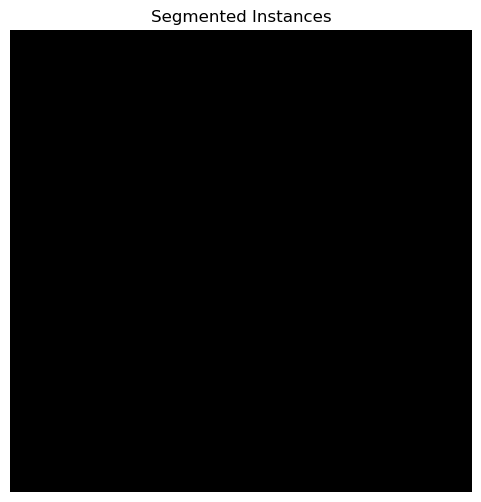

/var/tmp/ipykernel_347457/3802716606.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('/home/suriya/cyto-mask/final_bf/500.png')


AttributeError: 'Sam' object has no attribute 'generate'

In [ ]:
from segment_anything import 
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt
import micro_sam
from micro_sam.models import sam_model_registry

# Load the grayscale image
image = imread('/home/suriya/cyto-mask/final_bf/500.png')

# Convert from uint16 to uint8 if needed
if image.dtype == np.uint16:
    image = (image / 256).astype(np.uint8)  # Scale 0–65535 → 0–255

# If it's grayscale, convert to RGB
if image.ndim == 2:
    image = np.stack([image]*3, axis=-1)  # Shape (H, W, 3)

# Load the SAM model
sam_checkpoint = "/home/suriya/cyto-mask/vit_l.pt"
model_type = "vit_l"
sam_model = sam_model_registry[model_type](checkpoint=sam_checkpoint).cuda()

# Initialize the mask generator
mask_generator = SamAutomaticMaskGenerator(sam_model)

# Generate masks
masks = mask_generator.generate(image)

# Create segmentation map
segmentation = np.zeros(image.shape[:2], dtype=np.uint16)
for i, mask in enumerate(masks):
    print(f"Mask {i}: Area = {mask['area']}, Bounding Box = {mask['bbox']}")
    segmentation[mask['segmentation']] = i + 1

# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(segmentation, cmap='nipy_spectral')
plt.axis('off')
plt.title('Segmented Instances')
plt.show()


# Load model directly from path using the model registry
# Load the micro_sam model
model = sam_model_registry['vit_l'](
    checkpoint='/home/suriya/cyto-mask/vit_l.pt'
).cuda()


# Load the image
image = imread('/home/suriya/cyto-mask/final_bf/500.png')
# Convert from uint16 to uint8 if needed
if image.dtype == np.uint16:
    image = (image / 256).astype(np.uint8)  # Scale 0–65535 → 0–255
# If it's grayscale, convert to RGB 
if image.ndim == 2:
    image = np.stack([image]*3, axis=-1)  # Shape (H, W, 3)
# Generate masks
masks = model.generate(image)
# Create segmentation map
segmentation = np.zeros(image.shape[:2], dtype=np.uint16)
for i, mask in enumerate(masks):
    print(f"Mask {i}: Area = {mask['area']}, Bounding Box = {mask['bbox']}")
    segmentation[mask['segmentation']] = i + 1
# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(segmentation, cmap='nipy_spectral')
plt.axis('off')
plt.title('Segmented Instances')
plt.show()

/var/tmp/ipykernel_347457/3142705653.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
/var/tmp/ipykernel_347457/3142705653.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  segmentation = imageio.imread(segmentation_path)
/var/tmp/ipykernel_347457/3142705653.py:45: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  closed_edges = closing(binary_edges, square(1))


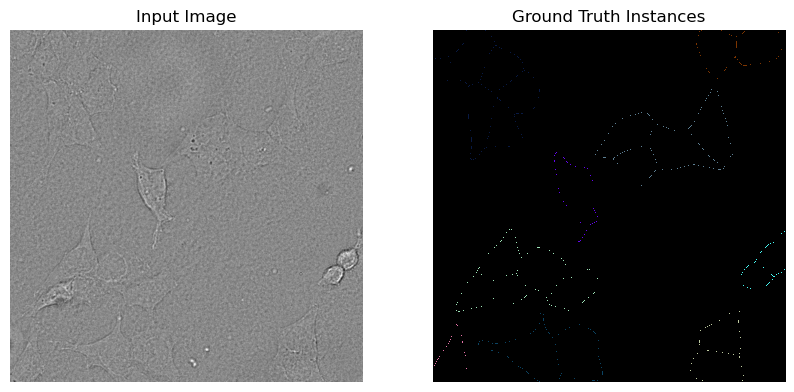

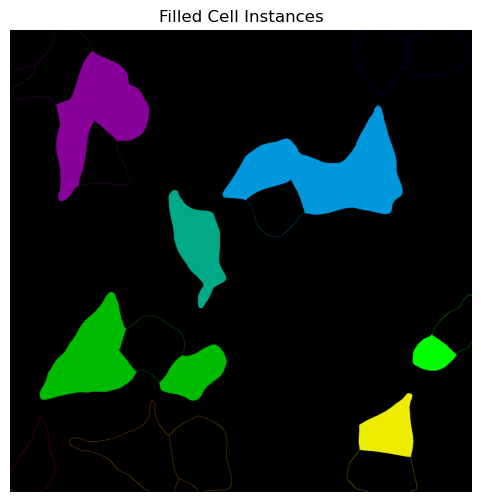

In [ ]:
from skimage.measure import label as connected_components
import imageio
from torch_em.util.util import get_random_colors


image_path = "/home/suriya/cyto-mask/final_bf/500.png"
segmentation_path = "/home/suriya/cyto-mask/final_edge_detected/merged_edges_500.png"

image = imageio.imread(image_path)
segmentation = imageio.imread(segmentation_path)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Input Image")
ax[0].axis("off")

segmentation = connected_components(segmentation)
ax[1].imshow(segmentation, cmap=get_random_colors(segmentation), interpolation="nearest")
ax[1].set_title("Ground Truth Instances")
ax[1].axis("off")

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, morphology, color
from skimage.draw import polygon
from scipy.ndimage import binary_fill_holes
from skimage.morphology import closing, square

image = io.imread('/home/suriya/cyto-mask/final_edge_detected/merged_edges_500.png')

# Extract only the right side (ground truth instances)
gt_instances = image

# Convert to grayscale if it's RGB
if gt_instances.ndim == 3:
    gt_gray = color.rgb2gray(gt_instances)
else:
    gt_gray = gt_instances

# Binarize (any non-zero pixel is part of an edge)
binary_edges = gt_gray > 0

# Close small gaps in the edges
closed_edges = closing(binary_edges, square(1))



# Fill holes to get full cell masks
filled_cells = binary_fill_holes(closed_edges)

# Label each connected component
labeled_cells = measure.label(f)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(labeled_cells, cmap='nipy_spectral')
plt.title('Filled Cell Instances')
plt.axis('off')
plt.show()

# fill inside the contours in the segmentation

In [22]:
! napari

00:30:17 : WARNING : MainThread : could not connect to display 
00:30:17 : WARNING : MainThread : Could not load the Qt platform plugin "xcb" in "" even though it was found.

Available platform plugins are: eglfs, minimal, minimalegl, offscreen, vnc, webgl, xcb.

00:30:17 : WARNING : MainThread : This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, minimal, minimalegl, offscreen, vnc, webgl, xcb.



In [ ]:
############################################# MICROSAM ###################################


--- Set 1 ---
Precision: 0.6869
Recall:    0.3956
F1-score:  0.5020
IoU:       0.3351

--- Set 2 ---
Precision: 0.8246
Recall:    0.2579
F1-score:  0.3929
IoU:       0.2445

--- Set 3 ---
Precision: 0.3415
Recall:    0.7083
F1-score:  0.4608
IoU:       0.2994

Best Parameter Set: Set 1
Best F1-score: 0.5020


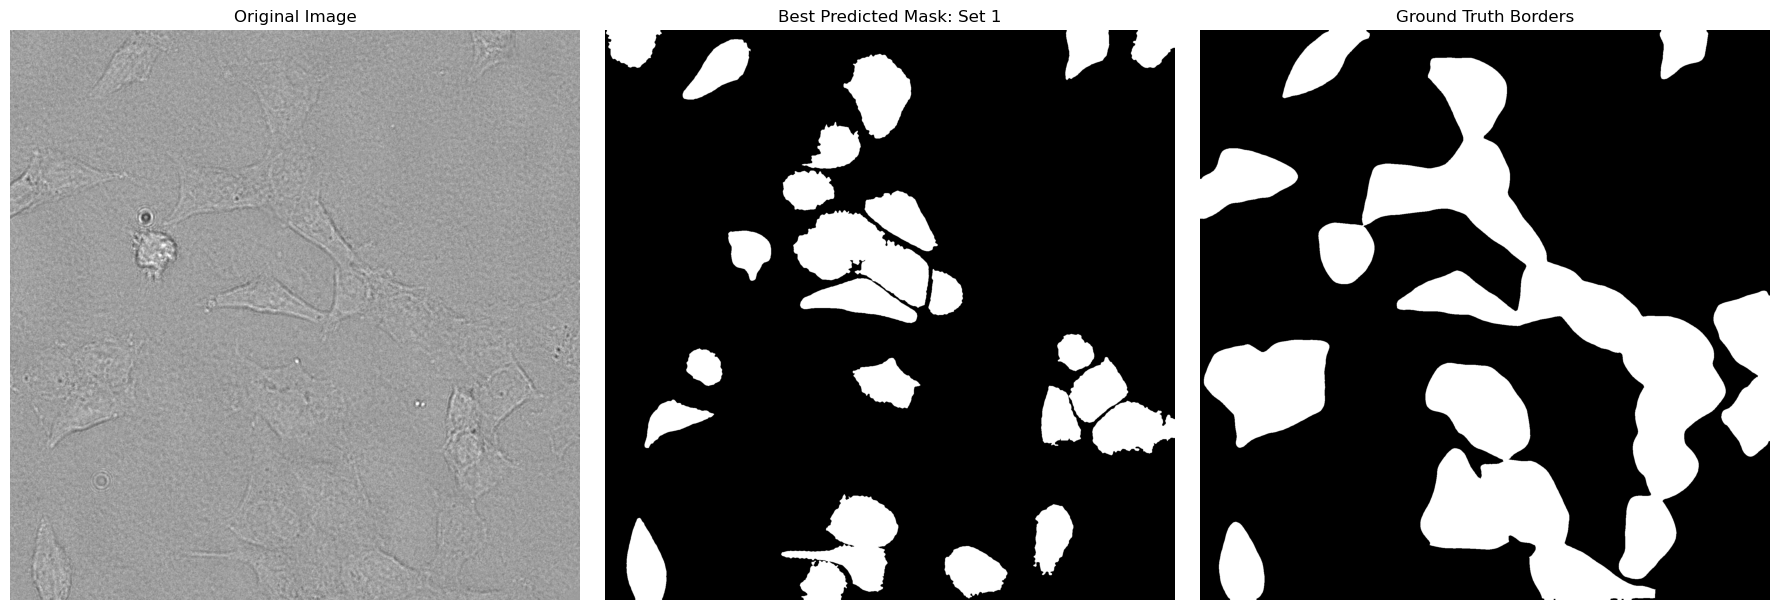

In [ ]:
#test with full mask


import cv2
import numpy as np
import matplotlib.pyplot as plt
from micro_sam.util import get_sam_model
from segment_anything import SamAutomaticMaskGenerator
import skimage.morphology as morph
from skimage.segmentation import find_boundaries

from sklearn.metrics import precision_score, recall_score, f1_score

# List of parameter sets to try
param_sets = [
    {"name": "Set 1", "pred_iou_thresh": 0.45, "stability_score_thresh": 0.4, "box_nms_thresh": 0.4},
    {"name": "Set 2", "pred_iou_thresh": 0.5,  "stability_score_thresh": 0.5, "box_nms_thresh": 0.3},
    {"name": "Set 3", "pred_iou_thresh": 0.35, "stability_score_thresh": 0.3, "box_nms_thresh": 0.5},
]

# Load raw image once
raw = cv2.imread("/home/suriya/cyto-mask/final_bf/412.png")
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
p2, p98 = np.percentile(enhanced, (2, 98))
enhanced = np.clip((enhanced - p2) * 255.0 / (p98 - p2), 0, 255).astype(np.uint8)
image = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)

# Load GT once
gt_raw = cv2.imread("/home/suriya/cyto-mask/450_dataset/merged_binary_cells/merged_412.png", cv2.IMREAD_GRAYSCALE)
gt_binary = (gt_raw > 127).astype(np.uint8).flatten()

# Load predictor once
predictor = get_sam_model(model_type="vit_l_lm", device="cuda")
predictor.set_image(image)

# Initialize variables to track the best parameters
best_f1 = -1
best_params = None
best_mask_image = None

# Run each parameter set
for params in param_sets:
    print(f"\n--- {params['name']} ---")

    mask_generator = SamAutomaticMaskGenerator(
        predictor.model,
        pred_iou_thresh=params["pred_iou_thresh"],
        stability_score_thresh=params["stability_score_thresh"],
        box_nms_thresh=params["box_nms_thresh"],
        crop_n_layers=0,
    )

    cands = mask_generator.generate(image)

    # Filter masks
    cell_masks = [
        c["segmentation"]
        for c in cands
        if 10000 < c["area"] < 45000
    ]
    if len(cell_masks) == 0:
        print("No valid segments.")
        continue

    global_mask = np.any(np.stack(cell_masks), axis=0)
    clean = morph.remove_small_objects(global_mask, min_size=5000)
    clean = morph.remove_small_holes(clean, area_threshold=5000)
    pred_binary = clean.astype(np.uint8).flatten()

    # Calculate precision, recall, and F1 score
    precision = precision_score(gt_binary, pred_binary)
    recall = recall_score(gt_binary, pred_binary)
    f1 = f1_score(gt_binary, pred_binary)

    # Calculate IoU (Intersection over Union)
    intersection = np.logical_and(gt_binary, pred_binary).sum()
    union = np.logical_or(gt_binary, pred_binary).sum()
    iou = intersection / union if union != 0 else 0

    # Track best parameter set based on F1 score
    if f1 > best_f1:
        best_f1 = f1
        best_params = params
        best_mask_image = clean.astype(np.uint8) * 255  # Store the best mask

    # Print precision, recall, F1 score, and IoU for each parameter set
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"IoU:       {iou:.4f}")

# Print the best parameter set
print(f"\nBest Parameter Set: {best_params['name']}")
print(f"Best F1-score: {best_f1:.4f}")

# Display the best mask with the raw image
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Left: Original raw image
axes[0].imshow(raw)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Middle: Best predicted mask
axes[1].imshow(best_mask_image, cmap='gray')
axes[1].set_title(f"Best Predicted Mask: {best_params['name']}")
axes[1].axis("off")

# Right: Ground truth borders
axes[2].imshow(gt_raw, cmap='gray')
axes[2].set_title("Ground Truth Borders")
axes[2].axis("off")

plt.tight_layout()
plt.show()



--- Set 1 ---
Precision: 0.0035
Recall:    0.0662
F1-score:  0.0067
IoU:       0.0033

--- Set 2 ---
Precision: 0.0033
Recall:    0.4165
F1-score:  0.0066
IoU:       0.0033

--- Set 3 ---
Precision: 0.0036
Recall:    0.1246
F1-score:  0.0070
IoU:       0.0035


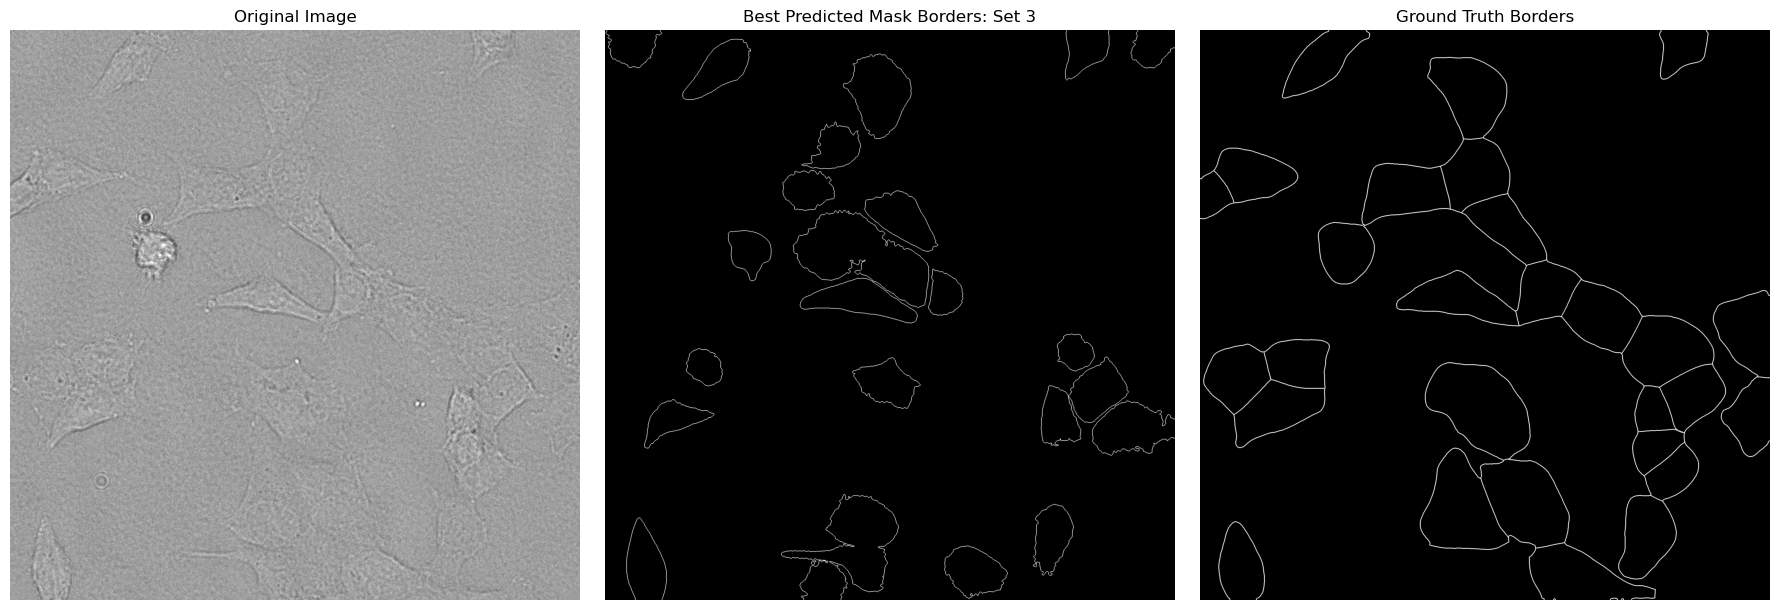

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from micro_sam.util import get_sam_model
from segment_anything import SamAutomaticMaskGenerator
import skimage.morphology as morph
from skimage.segmentation import find_boundaries

from sklearn.metrics import precision_score, recall_score, f1_score

# List of parameter sets to try
param_sets = [
    {"name": "Set 1", "pred_iou_thresh": 0.5,  "stability_score_thresh": 0.5, "box_nms_thresh": 0.3},
    {"name": "Set 2", "pred_iou_thresh": 0.35, "stability_score_thresh": 0.3, "box_nms_thresh": 0.5},
    {"name": "Set 3", "pred_iou_thresh": 0.45, "stability_score_thresh": 0.4, "box_nms_thresh": 0.4},
]

# Load raw image once
raw = cv2.imread("/home/suriya/cyto-mask/final_bf/412.png")
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
p2, p98 = np.percentile(enhanced, (2, 98))
enhanced = np.clip((enhanced - p2) * 255.0 / (p98 - p2), 0, 255).astype(np.uint8)
image = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)

# Load GT once
gt_raw = cv2.imread("/home/suriya/cyto-mask/final_edge_detected/merged_edges_412.png", cv2.IMREAD_GRAYSCALE)
gt_binary = (gt_raw > 127).astype(np.uint8).flatten()

# Load predictor once
predictor = get_sam_model(model_type="vit_l_lm", device="cuda")
predictor.set_image(image)

# Initialize variables to track the best parameters
best_f1 = -1
best_params = None
best_mask_image = None

# Run each parameter set
for params in param_sets:
    print(f"\n--- {params['name']} ---")

    mask_generator = SamAutomaticMaskGenerator(
        predictor.model,
        pred_iou_thresh=params["pred_iou_thresh"],
        stability_score_thresh=params["stability_score_thresh"],
        box_nms_thresh=params["box_nms_thresh"],
        crop_n_layers=0,
    )

    cands = mask_generator.generate(image)

    # Filter masks
    cell_masks = [
        c["segmentation"]
        for c in cands
        if 10000 < c["area"] < 45000
    ]
    if len(cell_masks) == 0:
        print("No valid segments.")
        continue

    global_mask = np.any(np.stack(cell_masks), axis=0)
    clean = morph.remove_small_objects(global_mask, min_size=5000)
    clean = morph.remove_small_holes(clean, area_threshold=5000)
    pred_binary = clean.astype(np.uint8).flatten()

    # Calculate metrics
    precision = precision_score(gt_binary, pred_binary)
    recall = recall_score(gt_binary, pred_binary)
    f1 = f1_score(gt_binary, pred_binary)
    intersection = np.logical_and(gt_binary, pred_binary).sum()
    union = np.logical_or(gt_binary, pred_binary).sum()
    iou = intersection / union if union != 0 else 0

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"IoU:       {iou:.4f}")

    # Extract borders
    border_mask = find_boundaries(clean, mode='thick').astype(np.uint8) * 255

    if f1 > best_f1:
        best_f1 = f1
        best_params = params
        best_mask_image = border_mask

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original raw image
axes[0].imshow(raw)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Best predicted mask borders
axes[1].imshow(best_mask_image, cmap='gray')
axes[1].set_title(f"Best Predicted Mask Borders: {best_params['name']}")
axes[1].axis("off")

# Ground truth borders
gt_borders = find_boundaries(gt_binary.reshape(gt_raw.shape), mode='thick').astype(np.uint8) * 255
axes[2].imshow(gt_borders, cmap='gray')
axes[2].set_title("Ground Truth Borders")
axes[2].axis("off")

plt.tight_layout()
plt.show()


Intersection over Union (IoU): 0.0106
Precision: 0.0170
Recall: 0.0271
F1 Score: 0.0209


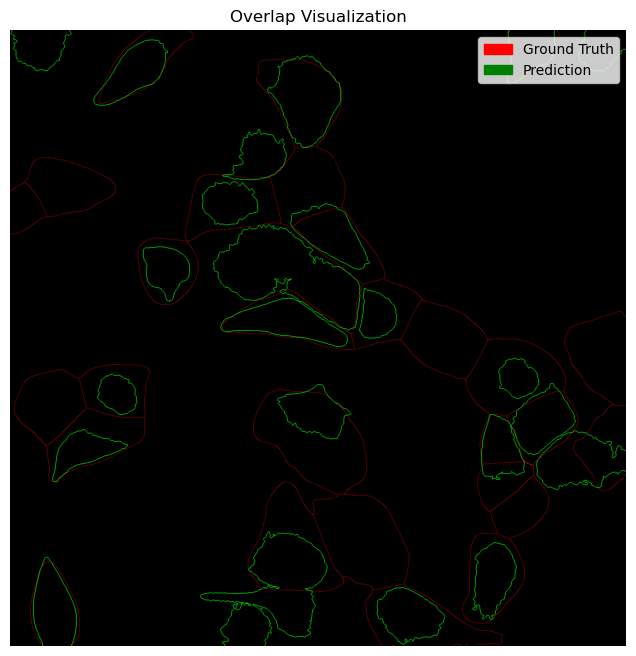

(0.010559179128221444,
 0.017019776274880605,
 0.02706422018348624,
 0.0208976957437179)

In [ ]:
#plotting the intersection of the previous with set 3 (best one)
# we see metrics are a lot worse when using just cell borders

def plot_intersection(border_image, gt_raw):
    # Convert to grayscale if not already
    if len(border_image.shape) > 2:
        border_image_1d = cv2.cvtColor(border_image, cv2.COLOR_BGR2GRAY)
    else:
        border_image_1d = border_image.copy()
    
    # Apply thresholding to create binary masks
    pred_binary = (border_image_1d > 0).astype(np.uint8)
    gt_binary = (gt_raw > 0).astype(np.uint8)
    
    # Flatten for metric calculation
    pred_flat = pred_binary.flatten()
    gt_flat = gt_binary.flatten()
    
    # Compute Intersection over Union (IoU)
    intersection = np.sum(np.logical_and(pred_flat, gt_flat))
    union = np.sum(np.logical_or(pred_flat, gt_flat))
    iou = intersection / union if union > 0 else 0
    
    # Compute Precision, Recall, and F1-Score
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    # Handle case where gt is all zeros
    if np.sum(gt_flat) == 0:
        precision = 1.0 if np.sum(pred_flat) == 0 else 0.0
        recall = 1.0
        f1 = 1.0 if np.sum(pred_flat) == 0 else 0.0
    else:
        precision = precision_score(gt_flat, pred_flat)
        recall = recall_score(gt_flat, pred_flat)
        f1 = f1_score(gt_flat, pred_flat)
    
    # Print the metrics
    print(f"Intersection over Union (IoU): {iou:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Create a color-coded visualization
    # Create RGB image for visualization (black background)
    vis_img = np.zeros((gt_raw.shape[0], gt_raw.shape[1], 3), dtype=np.uint8)
    
    # Ground truth in RED
    vis_img[gt_binary > 0] = [255, 0, 0]  # Red for ground truth
    
    # Prediction in GREEN
    vis_img[pred_binary > 0] = [0, 255, 0]  # Green for prediction

    
    # Plot the result
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_img)
    plt.title("Overlap Visualization")
    plt.axis("off")
    
    # Add a legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', edgecolor='red', label='Ground Truth'),
        Patch(facecolor='green', edgecolor='green', label='Prediction'),
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.show()
    
    return iou, precision, recall, f1

plot_intersection(border_mask, gt_raw)


Border masks underperform, so we'll use full masks in order to try and more enhanced results.

In [ ]:
#Use this model along with SAM's automatic mask generator to segment cells in brightfield microscopy images without requiring any manual prompts
#try 3 different params and choose best f1 score. Save image and then use for post-processing hyper-parameter tuning.
#dynamically choose the best param for each image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from micro_sam.util import get_sam_model
from segment_anything import SamAutomaticMaskGenerator
import skimage.morphology as morph
from sklearn.metrics import precision_score, recall_score, f1_score
import os

# Directory paths
dataset_path = "/home/suriya/cyto-mask/450_dataset/merged_binary_cells/"
bf_image_path = "/home/suriya/cyto-mask/final_bf/"
output_dir = "/home/suriya/cyto-mask/micrsam_predicted_masks/"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of parameter sets to try
param_sets = [
    {"name": "Set 1", "pred_iou_thresh": 0.45, "stability_score_thresh": 0.4, "box_nms_thresh": 0.4},
    {"name": "Set 2", "pred_iou_thresh": 0.5,  "stability_score_thresh": 0.5, "box_nms_thresh": 0.3},
    {"name": "Set 3", "pred_iou_thresh": 0.35, "stability_score_thresh": 0.3, "box_nms_thresh": 0.5},
]

# Load predictor once
predictor = get_sam_model(model_type="vit_l_lm", device="cuda")

# Iterate over all images in the dataset folder
for filename in os.listdir(dataset_path):
    if filename.endswith(".png"):
        gt_path = os.path.join(dataset_path, filename)
        img_id = filename.split("merged_")[-1].split(".png")[0]  # Extract the image ID (e.g., 412 from merged_412.png)
        bf_path = os.path.join(bf_image_path, f"{img_id}.png")  # Corresponding brightfield image path

        # Load the ground truth (GT) image
        gt_raw = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
        if gt_raw is None:
            print(f"Couldn't read ground truth image: {gt_path}")
            continue

        # Load the raw brightfield image
        raw = cv2.imread(bf_path)
        if raw is None:
            print(f"Couldn't read brightfield image: {bf_path}")
            continue

        # Apply CLAHE and contrast stretching
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced = clahe.apply(gray)
        p2, p98 = np.percentile(enhanced, (2, 98))
        enhanced = np.clip((enhanced - p2) * 255.0 / (p98 - p2), 0, 255).astype(np.uint8)
        image = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)

        # Set the image for the SAM model
        predictor.set_image(image)

        # Initialize variables to track the best parameters
        best_f1 = -1
        best_params = None
        best_mask_image = None

        # Try each parameter set
        for params in param_sets:
            print(f"\n--- {params['name']} --- for {img_id}")

            mask_generator = SamAutomaticMaskGenerator(
                predictor.model,
                pred_iou_thresh=params["pred_iou_thresh"],
                stability_score_thresh=params["stability_score_thresh"],
                box_nms_thresh=params["box_nms_thresh"],
                crop_n_layers=0,
            )

            cands = mask_generator.generate(image)

            # Filter masks
            cell_masks = [
                c["segmentation"]
                for c in cands
                if 10000 < c["area"] < 45000
            ]
            if len(cell_masks) == 0:
                print("No valid segments.")
                continue

            global_mask = np.any(np.stack(cell_masks), axis=0)
            clean = morph.remove_small_objects(global_mask, min_size=5000)
            clean = morph.remove_small_holes(clean, area_threshold=5000)
            pred_binary = clean.astype(np.uint8).flatten()
            gt_binary = (gt_raw > 127).astype(np.uint8).flatten()

            # Calculate precision, recall, and F1 score
            precision = precision_score(gt_binary, pred_binary)
            recall = recall_score(gt_binary, pred_binary)
            f1 = f1_score(gt_binary, pred_binary)

            # Calculate IoU (Intersection over Union)
            intersection = np.logical_and(gt_binary, pred_binary).sum()
            union = np.logical_or(gt_binary, pred_binary).sum()
            iou = intersection / union if union != 0 else 0

            # Track best parameter set based on F1 score
            if f1 > best_f1:
                best_f1 = f1
                best_params = params
                best_mask_image = clean.astype(np.uint8) * 255

            # Print precision, recall, F1 score, and IoU for each parameter set
            print(f"Precision: {precision:.4f}")
            print(f"Recall:    {recall:.4f}")
            print(f"F1-score:  {f1:.4f}")
            print(f"IoU:       {iou:.4f}")

        # Print the best parameter set
        print(f"\nBest Parameter Set: {best_params['name']}")
        print(f"Best F1-score: {best_f1:.4f}")

        # Save the best mask image to the output directory
        output_mask_path = os.path.join(output_dir, f"predicted_mask_{img_id}.png")
        cv2.imwrite(output_mask_path, best_mask_image)

        print(f"Saved predicted mask for {img_id} to {output_mask_path}")

print("Processing complete.")



--- Set 1 --- for 36
Precision: 0.3300
Recall:    0.1090
F1-score:  0.1638
IoU:       0.0892

--- Set 2 --- for 36
Precision: 0.7751
Recall:    0.0996
F1-score:  0.1765
IoU:       0.0968

--- Set 3 --- for 36
Precision: 0.1120
Recall:    0.6039
F1-score:  0.1889
IoU:       0.1043

Best Parameter Set: Set 3
Best F1-score: 0.1889
Saved predicted mask for 36 to /home/suriya/cyto-mask/micrsam_predicted_masks/predicted_mask_36.png

--- Set 1 --- for 433
Precision: 0.5999
Recall:    0.4240
F1-score:  0.4968
IoU:       0.3305

--- Set 2 --- for 433
Precision: 0.7755
Recall:    0.3841
F1-score:  0.5138
IoU:       0.3457

--- Set 3 --- for 433
Precision: 0.3034
Recall:    0.6332
F1-score:  0.4102
IoU:       0.2581

Best Parameter Set: Set 2
Best F1-score: 0.5138
Saved predicted mask for 433 to /home/suriya/cyto-mask/micrsam_predicted_masks/predicted_mask_433.png

--- Set 1 --- for 207
Precision: 0.5764
Recall:    0.1642
F1-score:  0.2555
IoU:       0.1465

--- Set 2 --- for 207
Precision: 0.78

In [ ]:
#Systematically evaluate the impact of post-processing parameters,
#like thresholding and dilation, applied to pre-generated outputs from the MicroSAM mask generation step.
#By calculating F1, recall, precision, and IoU  we can identify the settings that yield the best performance. 
# Also, this allows us to optimize the entire  pipeline for the data without needing to retrain  the large SAM model itself.

import os
import numpy as np
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score

def micro_sam_bf_load(pred_path, gt_path):
    pred = cv2.imread(pred_path, cv2.IMREAD_UNCHANGED)
    gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    return pred, gt

def evaluate_with_params(pred_dir, gt_dir, thresholds=[0], dilate_iters=[0]):
    best_metrics = {'iou': 0, 'precision': 0, 'recall': 0, 'f1': 0}
    best_params = {}
    results = []

    for thresh in thresholds:
        for dilate_iter in dilate_iters:
            print(f"Testing parameters: Threshold={thresh}, Dilation={dilate_iter}")
            iou_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []

            pred_files = [f for f in os.listdir(pred_dir) if f.endswith('.png')]

            for pred_file in pred_files:
                pred_path = os.path.join(pred_dir, pred_file)
                gt_file = "merged_" + pred_file.replace("predicted_mask_", "")
                gt_path = os.path.join(gt_dir, gt_file)

                if not os.path.exists(gt_path):
                    print(f"Ground truth not found for {pred_path}, skipping...")
                    continue

                raw_pred, raw_gt = micro_sam_bf_load(pred_path, gt_path)

                # Convert prediction to grayscale if needed
                pred_gray = cv2.cvtColor(raw_pred, cv2.COLOR_BGR2GRAY) if len(raw_pred.shape) == 3 else raw_pred

                # Apply threshold
                _, pred_bin = cv2.threshold(pred_gray, thresh, 255, cv2.THRESH_BINARY)
                pred_bin = (pred_bin > 0).astype(np.uint8)

                # Optional dilation
                if dilate_iter > 0:
                    kernel = np.ones((3, 3), np.uint8)
                    pred_bin = cv2.dilate(pred_bin, kernel, iterations=dilate_iter)

                # Binarize GT if not already binary
                gt_bin = (raw_gt > 0).astype(np.uint8)

                # Flatten
                pred_flat = pred_bin.flatten()
                gt_flat = gt_bin.flatten()

                # Compute metrics
                intersection = np.sum(np.logical_and(pred_flat, gt_flat))
                union = np.sum(np.logical_or(pred_flat, gt_flat))
                iou = intersection / union if union > 0 else 0
                precision = precision_score(gt_flat, pred_flat, zero_division=0)
                recall = recall_score(gt_flat, pred_flat, zero_division=0)
                f1 = f1_score(gt_flat, pred_flat, zero_division=0)

                iou_scores.append(iou)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)

            avg_iou = np.mean(iou_scores)
            avg_precision = np.mean(precision_scores)
            avg_recall = np.mean(recall_scores)
            avg_f1 = np.mean(f1_scores)

            results.append({
                'threshold': thresh,
                'dilate': dilate_iter,
                'avg_iou': avg_iou,
                'avg_precision': avg_precision,
                'avg_recall': avg_recall,
                'avg_f1': avg_f1
            })

            # Update best if this is better
            if avg_f1 > best_metrics['f1']:
                best_metrics = {
                    'iou': avg_iou,
                    'precision': avg_precision,
                    'recall': avg_recall,
                    'f1': avg_f1
                }
                best_params = {'threshold': thresh, 'dilate': dilate_iter}

    # Report
    print("=== Best Parameters ===")
    print(f"Threshold: {best_params['threshold']}, Dilation: {best_params['dilate']}")
    print("=== Best Metrics ===")
    print(f"IoU: {best_metrics['iou']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1']:.4f}")

    return results, best_params, best_metrics


# Example usage
results, best_params, best_metrics = evaluate_with_params(
    pred_dir="/home/suriya/cyto-mask/micrsam_predicted_masks",
    gt_dir="/home/suriya/cyto-mask/450_dataset/merged_binary_cells",
    thresholds=range(10, 200, 20),
    dilate_iters=[0, 1, 2,3]
)


Testing parameters: Threshold=10, Dilation=0
Testing parameters: Threshold=10, Dilation=1
Testing parameters: Threshold=10, Dilation=2
Testing parameters: Threshold=10, Dilation=3
Testing parameters: Threshold=30, Dilation=0
Testing parameters: Threshold=30, Dilation=1
Testing parameters: Threshold=30, Dilation=2
Testing parameters: Threshold=30, Dilation=3
Testing parameters: Threshold=50, Dilation=0
Testing parameters: Threshold=50, Dilation=1
Testing parameters: Threshold=50, Dilation=2
Testing parameters: Threshold=50, Dilation=3
Testing parameters: Threshold=70, Dilation=0
Testing parameters: Threshold=70, Dilation=1
Testing parameters: Threshold=70, Dilation=2
Testing parameters: Threshold=70, Dilation=3
Testing parameters: Threshold=90, Dilation=0
Testing parameters: Threshold=90, Dilation=1
Testing parameters: Threshold=90, Dilation=2
Testing parameters: Threshold=90, Dilation=3
Testing parameters: Threshold=110, Dilation=0
Testing parameters: Threshold=110, Dilation=1
Testing 


--- Results DataFrame ---
    threshold  dilate   avg_iou  avg_precision  avg_recall    avg_f1
0          10       0  0.253339       0.447681    0.464084  0.395863
1          10       1  0.258845       0.448490    0.477175  0.402586
2          10       2  0.264151       0.449171    0.489972  0.409009
3          10       3  0.269192       0.449701    0.502304  0.415059
4          30       0  0.253339       0.447681    0.464084  0.395863
5          30       1  0.258845       0.448490    0.477175  0.402586
6          30       2  0.264151       0.449171    0.489972  0.409009
7          30       3  0.269192       0.449701    0.502304  0.415059
8          50       0  0.253339       0.447681    0.464084  0.395863
9          50       1  0.258845       0.448490    0.477175  0.402586
10         50       2  0.264151       0.449171    0.489972  0.409009
11         50       3  0.269192       0.449701    0.502304  0.415059
12         70       0  0.253339       0.447681    0.464084  0.395863
13     

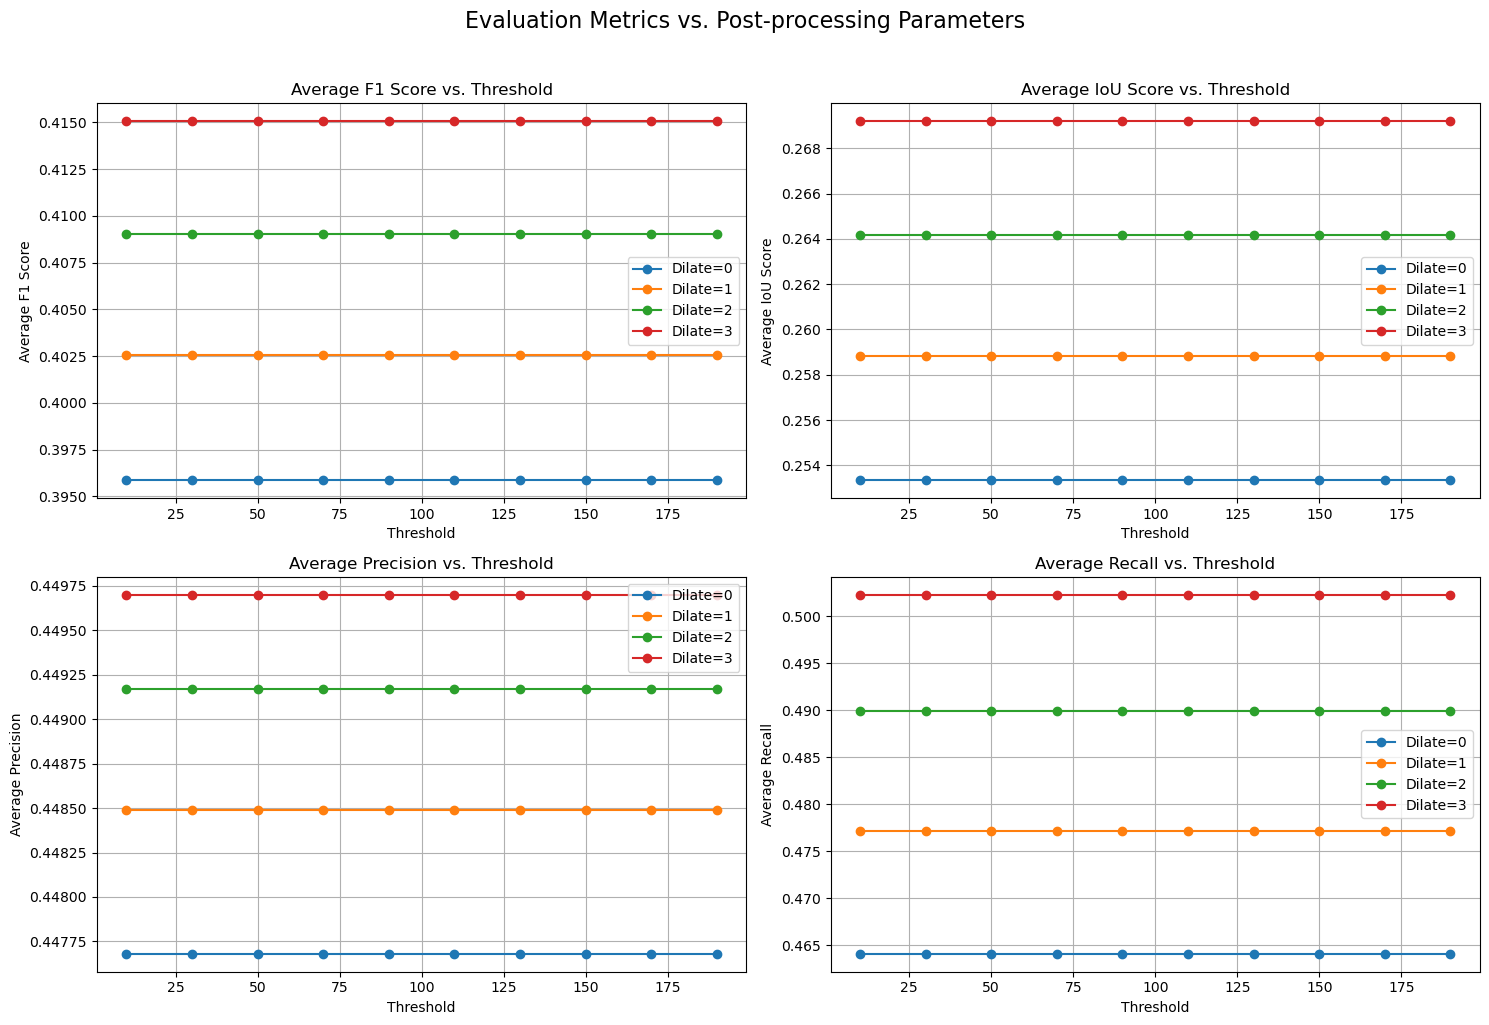

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# --- Plotting the Results ---

# # Convert results list to a pandas DataFrame for easier plotting
results_df = pd.DataFrame(results)

print("\n--- Results DataFrame ---")
print(results_df)

# Create a figure with four subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Adjust figsize as needed

# Plot F1 Score
ax1 = axes[0, 0]
for dilate_val in [0, 1, 2, 3]:
    subset = results_df[results_df['dilate'] == dilate_val]
    ax1.plot(subset['threshold'], subset['avg_f1'], marker='o', label=f'Dilate={dilate_val}')
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Average F1 Score")
ax1.set_title("Average F1 Score vs. Threshold")
ax1.legend()
ax1.grid(True)

# Plot IoU
ax2 = axes[0, 1]
for dilate_val in [0, 1, 2, 3]:
    subset = results_df[results_df['dilate'] == dilate_val]
    ax2.plot(subset['threshold'], subset['avg_iou'], marker='o', label=f'Dilate={dilate_val}')
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Average IoU Score")
ax2.set_title("Average IoU Score vs. Threshold")
ax2.legend()
ax2.grid(True)

# Plot Precision
ax3 = axes[1, 0]
for dilate_val in [0, 1, 2, 3]:
    subset = results_df[results_df['dilate'] == dilate_val]
    ax3.plot(subset['threshold'], subset['avg_precision'], marker='o', label=f'Dilate={dilate_val}')
ax3.set_xlabel("Threshold")
ax3.set_ylabel("Average Precision")
ax3.set_title("Average Precision vs. Threshold")
ax3.legend()
ax3.grid(True)

# Plot Recall
ax4 = axes[1, 1]
for dilate_val in [0, 1, 2, 3]:
    subset = results_df[results_df['dilate'] == dilate_val]
    ax4.plot(subset['threshold'], subset['avg_recall'], marker='o', label=f'Dilate={dilate_val}')
ax4.set_xlabel("Threshold")
ax4.set_ylabel("Average Recall")
ax4.set_title("Average Recall vs. Threshold")
ax4.legend()
ax4.grid(True)

fig.suptitle("Evaluation Metrics vs. Post-processing Parameters", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Increasing dilation values consistently improve all evaluation metrics (F1, IoU, Precision, and Recall), with the best performance observed at dilate=3. Threshold variation appears to have minimal impact, suggesting stability or limited importance of thresholding in this context.